In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[2]

'SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv'

In [104]:
dado = trata_dado(data_path + '/' + os.listdir(data_path)[2])

In [105]:
teste_serie_temporal(dado)

Foram encontradas 3 falhas na serie temporal.


[(Timestamp('2019-12-31 23:25:00'), Timestamp('2020-01-10 00:25:00')),
 (Timestamp('2020-09-14 07:55:00'), Timestamp('2020-10-29 14:25:00')),
 (Timestamp('2020-12-21 15:55:00'), Timestamp('2021-05-05 11:51:40'))]

In [106]:
evento_extremo(dado)

In [107]:
aproveitamento(dado, 'Hsig')

De 53906 valores, 171 foram marcados com a flag de pulo (0.32%).
4 valores foram marcados com a flag de crise (0.01%).


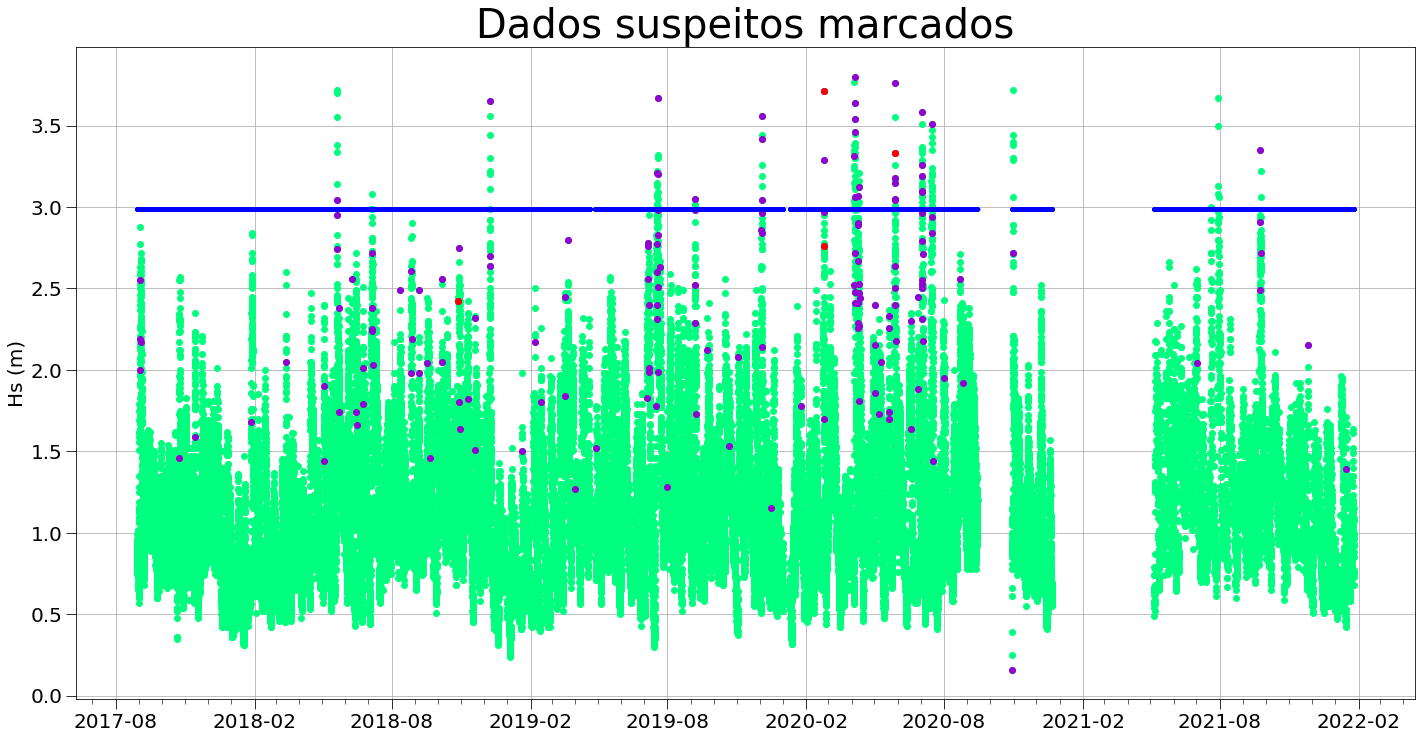

In [108]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = 'springgreen', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = 'darkviolet', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'blue', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_ylim(0,5)
# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('Dados suspeitos marcados', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ4')

In [109]:
datas = teste_serie_temporal(dado)


Foram encontradas 3 falhas na serie temporal.


In [110]:
def recorta_serie_temporal(datas, dataframe):
    dfs = [] # lista pra appendar todos os dataframes
    for i in range(len(datas)):
        if i == 0:
            serie = dataframe[:datas[0][0]]
        elif i == len(datas)-1:
            serie_extra = dataframe[datas[i-1][1]:datas[i][0]]
            serie = dataframe[datas[i][1]:]
            dfs.append(serie_extra)
        else: 
            serie = dataframe[datas[i-1][1]:datas[i][0]]
        dfs.append(serie)
    return(dfs)

In [111]:
serie1, serie2, serie3, serie4 = recorta_serie_temporal(teste_serie_temporal(dado), dado)

Foram encontradas 3 falhas na serie temporal.


In [112]:
media = serie1.mean()
desvpad = serie1.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie1))
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie1['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [113]:
media = serie2.mean()
desvpad = serie2.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie2)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie2['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [114]:
media = serie3.mean()
desvpad = serie3.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie3)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie3['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [115]:
media = serie4.mean()
desvpad = serie4.std()
evento_extremo = media + 4*desvpad

evento_extremo_line = np.zeros(len(serie4)) # como eu cheguei nesse valor?
for i in range(len(evento_extremo_line)):
        evento_extremo_line[i] = evento_extremo['Hsig']
        
serie4['EE'] = evento_extremo_line

/home/breno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


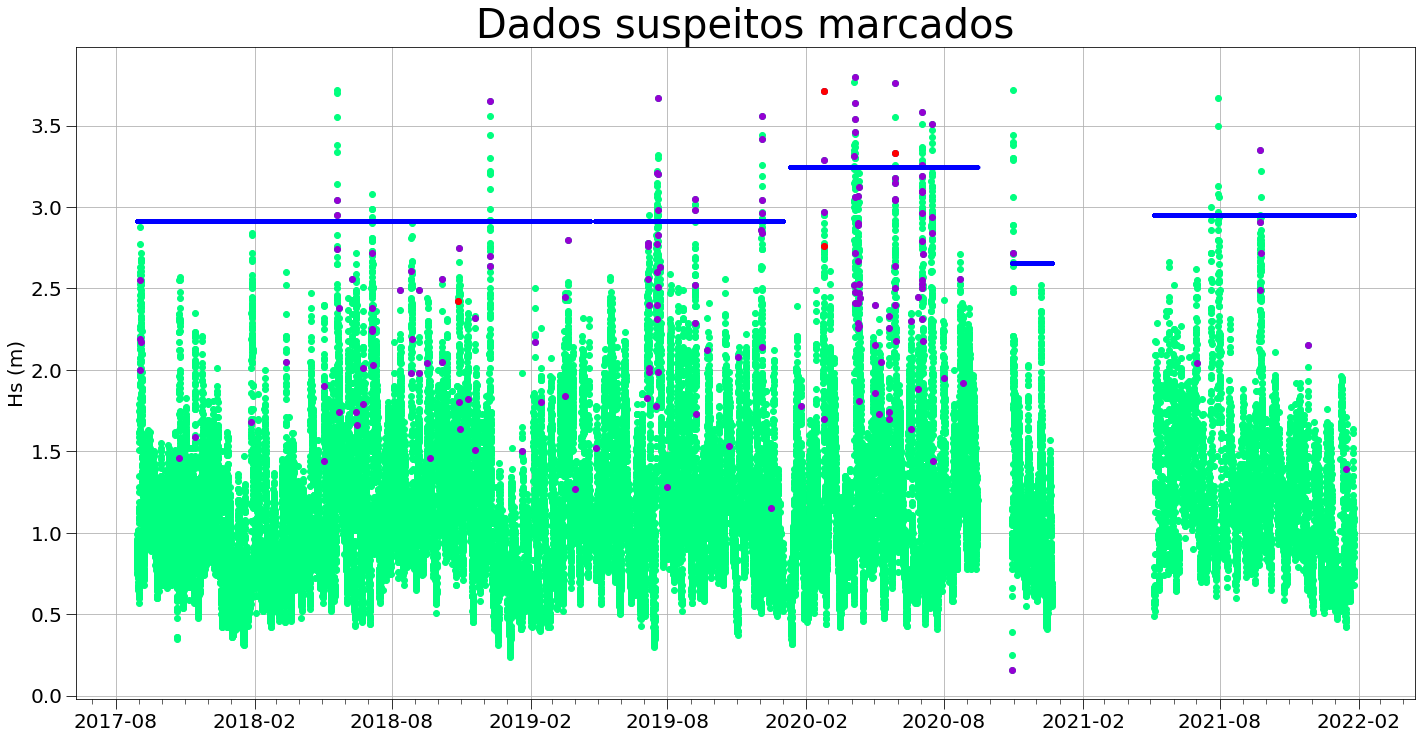

In [116]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = 'springgreen', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = 'darkviolet', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')


ax.plot(serie1['EE'][:], marker = '.', color = 'blue', linestyle = 'none')
ax.plot(serie2['EE'][:], marker = '.', color = 'blue', linestyle = 'none')
ax.plot(serie3['EE'][:], marker = '.', color = 'blue', linestyle = 'none')
ax.plot(serie4['EE'][:], marker = '.', color = 'blue', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('Dados suspeitos marcados', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ4_series_separadas')

In [117]:
from windrose import WindroseAxes

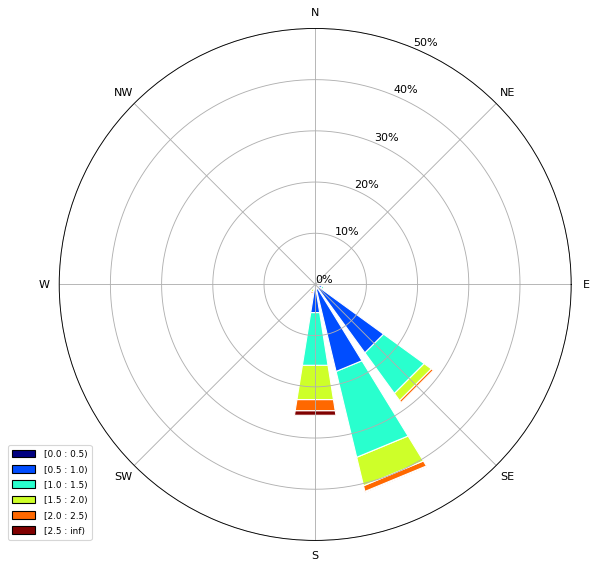

In [118]:
ws = dado['Hsig']
wd = dado['Avg_Wv_Dir_N']

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/RJ4_rosaHs')

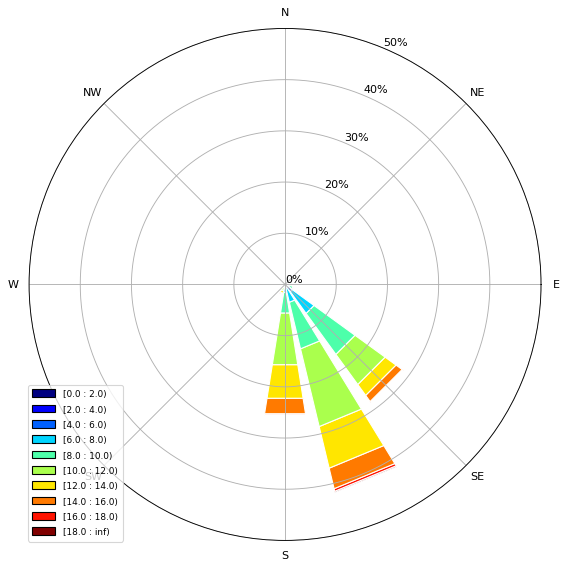

In [119]:
ws = dado['TP']


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
# ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
    
    
    
ax.set_legend()

plt.savefig(os.getcwd() +'/fig/RJ4_rosaTp')